# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [81]:
! pip install citipy

In [166]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [83]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [126]:
#sample city
citys = ["ostrovnoy","mahebourg","qaanaaq","zhuhai"]
citys

['ostrovnoy', 'mahebourg', 'qaanaaq', 'zhuhai']

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [170]:
url = "http://api.openweathermap.org/data/2.5/weather?appid="+ weather_api_key + "&q="
responses=[]
city_list=[]
for city in citys:
    city_data = requests.get(url + city).json()
    responses.append(city_data)
    city_list.append(city_data["name"])

city_list
#responses

[{'coord': {'lon': 39.51, 'lat': 68.05},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 274.42,
   'feels_like': 268.53,
   'temp_min': 274.42,
   'temp_max': 274.42,
   'pressure': 1005,
   'humidity': 86,
   'sea_level': 1005,
   'grnd_level': 1003},
  'visibility': 10000,
  'wind': {'speed': 5.42, 'deg': 310},
  'clouds': {'all': 99},
  'dt': 1602881571,
  'sys': {'country': 'RU', 'sunrise': 1602822617, 'sunset': 1602855859},
  'timezone': 10800,
  'id': 556268,
  'name': 'Ostrovnoy',
  'cod': 200},
 {'coord': {'lon': 57.7, 'lat': -20.41},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02n'}],
  'base': 'stations',
  'main': {'temp': 293.15,
   'feels_like': 294.1,
   'temp_min': 293.15,
   'temp_max': 293.15,
   'pressure': 1017,
   'humidity': 88},
  'visibility': 10000,
  'wind': {'speed': 2.6, 'deg': 320},
  'clouds': {'all': 20},
  

## Convert Raw Data to DataFrame
* Save as csv

In [185]:
lat = []
lng=[]
Max_Temp = []
Cloudiness=[]
Humidity=[]
Wind_Speed=[]
country=[]
date=[]

for city in citys:
    response = requests.get(url + city).json()
    lat.append(response['coord']['lat'])
    lng.append(response['coord']['lon'])
    Max_Temp.append(response['main']['temp_max'])
    Cloudiness.append(response['clouds']['all'])
    Humidity.append(response['main']['humidity'])
    Wind_Speed.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    date.append(response['dt'])

#time.sleep(1)
weather_dict = {
    "city": citys,
    "lat": lat,
    "lng":lng,
    "Max_Temp":Max_Temp,
    "Cloudiness":Cloudiness,
    "Humidity":Humidity,
    "Wind_Speed": Wind_Speed,
    "country":country,
    "date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lng,Max_Temp,Cloudiness,Humidity,Wind_Speed,country,date
0,ostrovnoy,68.05,39.51,271.85,22,94,1.69,RU,1602952186
1,mahebourg,-20.41,57.70,297.15,75,73,1.50,MU,1602952186
2,qaanaaq,77.48,-69.36,273.57,98,88,2.59,GL,1602952186
3,zhuhai,22.28,113.57,298.15,40,78,7.20,CN,1602952186


In [186]:
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

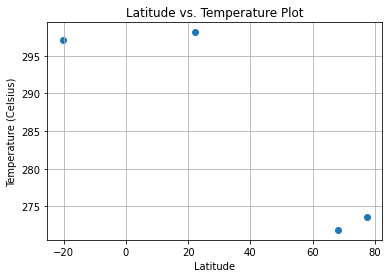

In [188]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Max_Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Temperature.png")

# Show plot
plt.show()

### Latitude vs. Humidity Plot

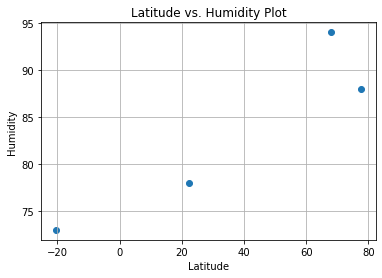

In [189]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

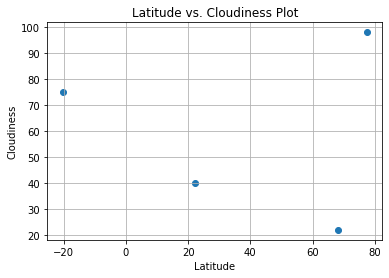

In [190]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

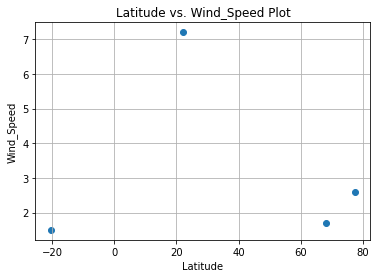

In [192]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Wind_Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind_Speed Plot")
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind_Speed.png")

# Show plot
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression